# Global Statistic 2023 Dataset🚀🚀🚀🚀🚀🚀

# Introduction
This is the global YouTube statistical 2023 data set uh so it's collectedg all the YouTube channel data which is used for analysis and we get a valuable insight from the different platforms there are many categories such as education, food etc. so from this comprehensive detail on this YouTube statistical data set we can get some features such as creator's subscriber, video views, upload country of origins ,earning and etc so this is one of the treasure and using this we can find the marketing strategies and how this online evolving over the time and this will provide knowledge on YouTube how is the world world is going on using this YouTube ideology

# Libraries

In the Jupyter Notebook environment, the following essential libraries are imported to facilitate exploratory data analysis and implementation of this project:

    pandas: This library is utilized for efficient data processing, manipulation, and analysis, allowing for seamless handling of large datasets.

    folium: Used for generating interactive maps, Folium simplifies the visualization of geographical data, enabling intuitive exploration of spatial relationships.

    hvplot: Leveraging the power of HoloViews, hvplot facilitates the creation of high-level visualizations with concise syntax. It is particularly useful for mapping geo-location data and creating interactive widgets to enhance data exploration and analysis.

In [5]:
!pip install hvplot
!pip install contextily
!pip install panel
!pip install cartopy geoviews
!pip install folium
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
  Attempting uninstall: panel
    Found existing installation: panel 1.3.8
    Uninstalling panel-1.3.8:
      Successfully uninstalled panel-1.3.8


In [80]:
import folium
import hvplot.pandas
import panel as pn
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
from panel.interact import interact
import plotly.express as px
import contextily as cx
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**This code snippet utilizes pandas to read a Data from a specified URL, 'https://raw.githubusercontent.com/TheNewtonsRing/Global-YouTube-Statistics-2023/main/Global%20YouTube%20Statistics.csv', employing the 'latin1' encoding for proper handling of character encoding.**


In [81]:
url = 'https://raw.githubusercontent.com/TheNewtonsRing/Global-YouTube-Statistics-2023/main/Global%20YouTube%20Statistics.csv'
df = pd.read_csv(url, encoding='latin1')


**Data Cleaning and Preprocessing**:

- **Loading Data**: The CSV data is loaded into a DataFrame named df for further processing.

- **Handling Missing Values**: Rows with missing values are dropped to ensure data integrity.

- **Data Type Conversion**: The 'video views' and 'subscribers' columns are converted to numeric type. Non-numeric entries are handled gracefully.

- **Datetime Conversion**: The 'created_year' column is converted to datetime type, extracting the year component for analysis.

- **Column Dropping**: Unnecessary columns such as 'Title', 'Abbreviation', 'channel_type_rank' can be optionally dropped for streamlined analysis.

- **Saving Preprocessed Data**: The cleaned DataFrame is saved to a new CSV file named 'global_youtube_statistics_cleaned.csv', ready for further exploration and analysis.


In [82]:
# Preprocessing
# Load the CSV data

# Drop rows with missing values
df.dropna(inplace=True)

# Convert video views and subscribers columns to numeric type
df['video views'] = pd.to_numeric(df['video views'], errors='coerce')
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')

# Convert created_year to datetime type
df['created_year'] = pd.to_datetime(df['created_year'], format='%Y').dt.year


# Drop unnecessary columns if needed
# For example, you may want to drop the 'Title', 'Abbreviation', 'channel_type_rank' columns
# df.drop(['Title', 'Abbreviation', 'channel_type_rank'], axis=1, inplace=True)

# Save the preprocessed data to a new CSV file
df.to_csv('global_youtube_statistics.csv', index=False)


**df.columns returns the column labels of the DataFrame df.**
This will list down all the columns present in dataframe or csv file has.

In [83]:
df.columns


Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# Making Slider
The slider widget was created using an interactive tool that allows combination with other widgets. It spans the years 1970 to 2023, with increments of one years, and starts at 1970. Adjusting the slider dynamically updates the graph or map display.

In [84]:
min_year = 1970
max_year = 2023

# Create the slider widget
year_slider = pn.widgets.IntSlider(name='Year Slider', start=min_year, end=max_year, step=1, value=min_year)

# Display the slider widget
year_slider

IntSlider(end=2023, name='Year Slider', sizing_mode='stretch_width', start=1970, value=1970)

# yaxis for Subscriber and Video View
so this is about by creating a pipeline for the Y axis  creating the radio button for Y axis this is for subscriber and also a video view so whenever the slider started from one area to the other year automatically it will plot the graph for the particular subscriber that means in that duration what how much subscribers are that and how much video we will use are there so it is plotted in the graph

In [85]:
yaxis_selector = pn.widgets.RadioBoxGroup(
    name='Y-axis Variable',
    options=['Subscribers', 'Video Views'],
    inline=True,
    value='Subscribers'  # Default value
)

# Display the y-axis selector widget
yaxis_selector

RadioBoxGroup(inline=True, name='Y-axis Variable', options=['Subscribers', ...], sizing_mode='stretch_width', value='Subscribers')

# yaxis for channel type and created Year
Similar to the above it is created for the channel type and the created year so once the slider is moved it will plot the graph based on the what are the channel type maybe it may be food, entertainment etc so which time it will be created it is created so these things will be plotted using this pipeline

In [86]:
yaxis_selector = pn.widgets.RadioBoxGroup(
    name='Y-axis Variable',
    options=['Channel Type', 'Created Year'],
    inline=True,
    value='Channel Type'  # Default value
)

# Display the y-axis selector widget
yaxis_selector

RadioBoxGroup(inline=True, name='Y-axis Variable', options=['Channel Type', ...], sizing_mode='stretch_width', value='Channel Type')

# hvplot
we create using this hvplot library we are just plotting the graph for channel type and the created area based on the slider or moment


In [87]:
# Plot Subscriber vs. Video Views with Channel Type on y-axis
subscriber_video_view_plot = df.hvplot.scatter(
    x='subscribers',
    y='video views',
    by='channel_type',
    xlabel='Subscribers',
    ylabel='Video Views',
    title='Subscriber vs. Video Views by Channel Type'
)
# Plot Subscriber vs. Video Views with Created Year on y-axis
subscriber_video_view_year_plot = df.hvplot.scatter(
    x='created_year',
    y='subscribers',
    xlabel='Created Year',
    ylabel='Subscribers',
    title='Subscriber vs. Video Views by Created Year'
)
# Display the plots
subscriber_video_view_plot + subscriber_video_view_year_plot


/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .NdOverlay.I :NdOverlay   [channel_type]
      :Scatter   [subscribers]   (video views)
   .Scatter.I   :Scatter   [created_year]   (subscribers)

# Explanation of the Above Graph (HVplot for subscriber and video view)
we can see the year slider and then we can see two buttons in it. one is subscribers and others video view and can see the graph where the X axis is about created a year and the Y axis about subscriber this Y axis will be changed if we move if we click on the button video view so we are evaluating the subscriber and video view based on the year so once the slider is moved from 1970 to some specific year automatically. we can predict that based on the movement of the slider the subscriber count on the particular channels the plot will be illustrated for the specific year similar to that if you click on the button video view for all the channels we can see the count of the video views in the higher low value.

# scatter plot
We also drawn the scatter plot for the latitude longitude of the given data set so here we are getting the data set for the different country we are plotting the graph in this scatter plot. Based on this scatter graph we can understand that how many Youtubers are available in the world.

In [88]:
scatter_plot = df.hvplot.scatter(
    x='subscribers',
    y='video views',
    title='Subscriber vs. Video Views',
    xlabel='Subscribers',
    ylabel='Video Views',
    height=400,
    width=600
)

# Display the scatter plot
scatter_plot

:Scatter   [subscribers]   (video views)

# Creating Folium Map
Generating a Folium map involves creating a map using latitude and longitude coordinates. Various tile options such as OpenStreetMap, CartoDB Positron, and Stamen Terrain are available for customization. These tile layers are added to a marker cluster, which is then populated by iterating through the dataset to collect details such as YouTuber information, country, video views, and lowest monthly earnings. Finally, the Folium map is plotted with these collected data points


In [89]:

# Filter out rows with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered on a specific location
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add markers for each data point
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Youtuber: {row['Youtuber']}<br>Subscribers: {row['subscribers']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(folium_map)

# Display the map
folium_map

# Integrating the panel with the folium map
Integrating Panel with the Folium map involves several steps. Initially, latitude and longitude data from the dataset are retrieved, followed by sorting the dataset based on unique values. A country selector widget, implemented as a dropdown, is utilized to enable country selection. The objective is to dynamically display corresponding values on the map upon user selection of a country.

Three distinct maps are generated:

    The first map showcases uploaded videos and total subscribers for the selected country.
    The second map illustrates urban population and total subscribers for the chosen country.
    The third map visualizes unemployment rate versus subscribers.

These maps are then integrated into the Panel framework to facilitate seamless interaction and visualization.

In [90]:
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered on a specific location
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add markers for each data point
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Youtuber: {row['Youtuber']}<br>Subscribers: {row['subscribers']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(folium_map)

# Create a Panel pane to display the Folium map
folium_pane = pn.pane.HTML(folium_map._repr_html_(), width=800, height=600)

# Display the Panel dashboard
pn.Column(folium_pane).servable()

Column(sizing_mode='stretch_width')
    [0] HTML(str, height=600, sizing_mode='fixed', width=800)

# Dashboard
**The dashboard is designed to delve into various aspects of the provided YouTube dataset, including content strategy, market research, competitive analysis, and geographical insights.**


1. **Content Strategy**: Analyzing subscriber counts and video views aids in understanding content demands on YouTube. Channels with high engagement tend to attract more subscribers, indicating effective content strategies.

    
2. **Market Research**: By examining the distribution of channels across different countries, we gain insights into audience preferences and interests. This allows us to identify popular channel categories and understand global audience trends.

3. **Competitive Analysis**: The dashboard highlights the types of channels preferred by users worldwide. This information is valuable for individuals seeking to enhance their presence in different fields and increase their subscription rates.

4. **Geographical Insights**: Geographical insights enable users and marketing professionals to target specific regions based on audience interests. This data-driven approach enhances market strategies and facilitates targeted marketing efforts.



In [91]:
# function based approach is used as it organises the code properly and easy to debug

def content_strategy_plot(df,year=None):
    content_plot = df.hvplot.scatter(
        x='subscribers',
        y='video views',
        xlabel='Subscribers',
        ylabel='Video Views',
        title='Subscriber vs Video Views',
         height=400, width=700
    )
    return pn.Row(content_plot)

def market_research_plot(df,year=None):
    country_counts = df['Country'].value_counts()
    market_plot = country_counts.hvplot.bar(
        xlabel='Country',
        ylabel='Number of Channels',
        title='Distribution of Channels Across Countries',
        height=400, width=700
    )
    return market_plot

def competitive_analysis_plot(df,year=None):
    channel_type_counts = df['channel_type'].value_counts()
    competitive_plot = channel_type_counts.hvplot.bar(
        xlabel='Channel Type',
        ylabel='Number of Channels',
        title='Preferred Channel Types',
        height=400, width=700
    )
    return competitive_plot

def geographical_insight_map(df):
    world_map = folium.Map(location=[0, 0], zoom_start=2)
    for index, row in df.iterrows():
        folium.Marker([row['Latitude'], row['Longitude']], popup=row['Youtuber']).add_to(world_map)
    geo_insight_map = pn.panel(world_map, width=800, height=600)
    return geo_insight_map

def create_dashboard(df):
    content_strategy = content_strategy_plot(df)
    market_research = market_research_plot(df)
    competitive_analysis = competitive_analysis_plot(df)
    geographical_insight = geographical_insight_map(df)

    dashboard = pn.Column(
        content_strategy,
        pn.Row(market_research, competitive_analysis),
        geographical_insight
    )

    return dashboard


dashboard = create_dashboard(df)
dashboard


Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] HoloViews(Scatter, height=400, sizing_mode='fixed', width=700)
    [1] Row(sizing_mode='stretch_width')
        [0] HoloViews(Bars, height=400, sizing_mode='fixed', width=700)
        [1] HoloViews(Bars, height=400, sizing_mode='fixed', width=700)
    [2] Folium(Map, height=600, sizing_mode='fixed', width=800)

**HTML-DASHBOARD**


The dashboard provided contains information about various YouTube channels, including their rank based on subscriber count, the name of the YouTuber, number of subscribers, total video views, category of content, number of uploads, country of origin, abbreviation for the country, channel type, and additional details.


1. Content Strategy
2. Market Research
3. Competitive Analysis
4. Geographical Insights
5. Economic Impact








Total Number of Sample Data: 13138<br>
Total Number of Countries: 222<br>
Total Number of Channel Types: 7<br>
Country with Least Subscribers: Mozambique<br>
Country with Most Subscribers: United States<br>


Note: Numeric values are sample, actual ones will reflect in graph

In [92]:
import folium
from folium.plugins import MarkerCluster
import panel as pn


total_countries = len(df['Country'].unique())
total_category = len(df['channel_type'].unique())
min_subscribers_country = df.loc[df['subscribers'].idxmin()]['Country']
max_subscribers_country = df.loc[df['subscribers'].idxmax()]['Country']


summary_text = f"""
**<span style="color: blue;">Summary:</span>**
- The dataset provided contains information about various YouTube channels, including their rank based on subscriber count, the name of the YouTuber, number of subscribers, total video views, category of content, number of uploads, country of origin, abbreviation for the country, channel type, and additional details.
- <span style="font-weight: bold;">Content Strategy</span>
- <span style="font-weight: bold;">Market Research</span>
- <span style="font-weight: bold;">Competitive Analysis</span>
- <span style="font-weight: bold;">Geographical Insights</span>
- <span style="font-weight: bold;">Economic Impact</span><br><br>

<span style="font-weight: bold;">Total Number of Sample Data:</span> {len(df)}<br>
<span style="font-weight: bold;">Total Number of Countries:</span> {total_countries}<br>
<span style="font-weight: bold;">Total Number of Channel Type:</span> {total_category}<br>
<span style="font-weight: bold; color: green;">Country with Least Subscribers:</span> {min_subscribers_country}<br>
<span style="font-weight: bold; color: red;">Country with Most Subscribers:</span> {max_subscribers_country}
"""

summary_pane = pn.pane.Markdown(summary_text, width=500, height=400)

# Function to update data based on filter selections
def update_data():
    year = year_slider.value
    channel_type = channel_type_dropdown.value
    country = country_dropdown.value
    # df['created_year'] = pd.to_datetime(df['created_year'], unit='ns').dt.year
    # print(df['created_year'].head(5),"data in frame",year)
    # Filter the data based on the selected year, channel type, and country
    filtered_df = df[(df['created_year'] <= year) & (df['channel_type'] == channel_type) & (df['Country'] == country)]
    return filtered_df

# Function to refresh the map based on filtered data
def refresh_map(filtered_df):
    filtered_map = folium.Map(location=[0, 0], zoom_start=3, tiles='OpenStreetMap')
    marker_cluster = MarkerCluster().add_to(filtered_map)
    for index, row in filtered_df.iterrows():
        count = filtered_df[(filtered_df['Latitude'] == row['Latitude']) & (filtered_df['Longitude'] == row['Longitude'])].shape[0]
        popup_text = f"{row['Youtuber']} (Count: {count})"
        folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text).add_to(marker_cluster)
    return filtered_map

# Define the Folium map
world_map = folium.Map(location=[0, 0], zoom_start=4)

# Define the slider widget
min_year = 2000
max_year = 2023
year_slider = pn.widgets.IntSlider(name='Year Slider', start=min_year, end=max_year, step=1, value=2000)

# Define the dropdowns for filtering by channel type and country
channel_types = df['channel_type'].unique().tolist()
channel_type_dropdown = pn.widgets.Select(name='Channel Type', options=channel_types, value='Entertainment')
countries = df['Country'].unique().tolist()
country_dropdown = pn.widgets.Select(name='Country', options=countries, value='United States')

# reset all
clear_button = pn.widgets.Button(name='Clear All Widgets', button_type='primary')
# Define the callback function to clear all widgets
def clear_widgets(event):
    # Reset the values of the slider and dropdown widgets
    year_slider.value = 2012
    channel_type_dropdown.value = 'Entertainment'
    country_dropdown.value = 'United States'

# Register the callback function with the clear button widget
clear_button.on_click(clear_widgets)



# Define the update_map function to update the map when filter selections change
def update_map(event=None):
    filtered_df = update_data()
    filtered_map = refresh_map(filtered_df)
    # market_research_plot(filtered_df)
    content_strategy_plot(df)
    dashboard[-2] = pn.panel(filtered_map, width=1240, height=750)
    # dashboard[-1] = pn.panel(competitive_analysis_plot(filtered_df), width=500, height=750)


# Call the update_map function to initialize the map with default values
update_map()

# Register the callback with the widgets
year_slider.param.watch(update_map, 'value')
channel_type_dropdown.param.watch(update_map, 'value')
country_dropdown.param.watch(update_map, 'value')

# Create a Panel dashboard layout
# Create a Panel dashboard layout
dashboard = pn.Column(
    summary_pane,
    pn.Row(year_slider, channel_type_dropdown, country_dropdown),
    pn.Row(pn.Column(update_map)),
    pn.Row(
        pn.Column(content_strategy_plot(df), width=500),
        pn.Spacer(width=50),
        pn.Column(competitive_analysis_plot(df), width=500)
    ),
    sizing_mode="stretch_width"  # Ensuring the layout stretches horizontally
)

dashboard



Column(sizing_mode='stretch_width')
    [0] Markdown(str, height=400, sizing_mode='fixed', width=500)
    [1] Row(sizing_mode='stretch_width')
        [0] IntSlider(end=2023, name='Year Slider', sizing_mode='stretch_width', start=2000, value=2000)
        [1] Select(name='Channel Type', options=['Music', 'Entertainment',...], sizing_mode='stretch_width', value='Entertainment')
        [2] Select(name='Country', options=['India', 'United States',...], sizing_mode='stretch_width', value='United States')
    [2] Row(sizing_mode='stretch_width')
        [0] Column(sizing_mode='stretch_width')
            [0] Column(sizing_mode='stretch_width')
                [0] Column(sizing_mode='stretch_width')
                [1] Row(sizing_mode='stretch_width')
                    [0] Str(None, name='interactive1591544', sizing_mode='stretch_width')
    [3] Row(sizing_mode='stretch_width')
        [0] Column(width=500)
            [0] Row(sizing_mode='stretch_width')
                [0] HoloViews(Scatter, height=400, sizing_mode='fixed', width=700)
        [1] Spacer(width=50)
        [2] Column(width=500)
            [0] HoloViews(Bars, height=400, sizing_mode='fixed', width=700)

In [93]:
from bokeh.resources import INLINE
dashboard.save('dashboard.html', embed=True, resources=INLINE)

In [94]:
!pip install jupyter_bokeh


Column(sizing_mode='stretch_width')
    [0] IntSlider(end=2023, name='Year slider', sizing_mode='stretch_width', start=2000, value=2000)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False, sizing_mode='stretch_width')
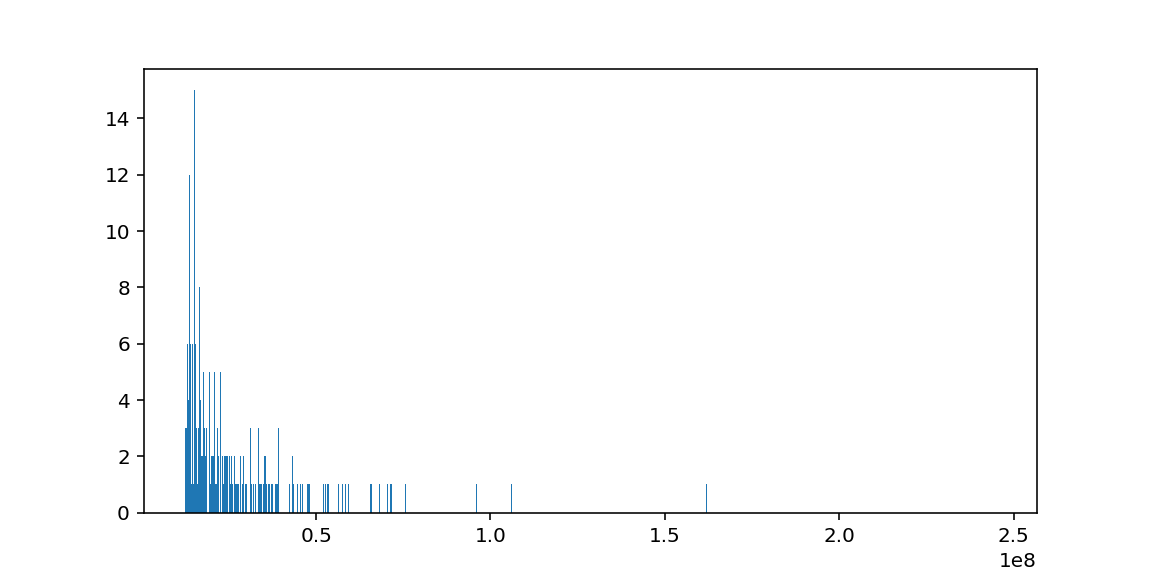

In [95]:
from matplotlib.figure import Figure
import panel as pn
import numpy as np
pn.extension(sizing_mode="stretch_width", template="bootstrap")

def plot(data, bins):
    fig = Figure(figsize=(8,4))
    ax = fig.subplots()
    ax.hist(data, bins=bins)
    return fig


bins_upload = pn.widgets.IntSlider(name='Year slider', start=int(df["uploads"].min()), end=int(df["uploads"].max()), step=5, value=int(df["uploads"].min()))
bins_input = pn.widgets.IntSlider(name='Year slider', start=min_year, end=max_year, step=1, value=min_year)
bplot = pn.bind(plot, data=df['subscribers'], bins=bins_input)

pn.Column(bins_input, bplot).servable()

In [96]:
%%shell
jupyter nbconvert final_op.ipynb --to html

[NbConvertApp] Converting notebook final_op.ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys([]) is not able to be represented.
  warn(
[NbConvertApp] Writing 3128860 bytes to final_op.html
